In [1]:
include("HDStat.jl")
using HDStat, PyPlot

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 25 days
INFO: Loading help data...


In [34]:
xs = rand(ARMPModel(2, 200, 0.95))
xf = rand(ARMPModel(2, 200, 0.05))

2x200 Array{Float64,2}:
 -0.62446  1.69729    -0.409452  …  -0.988133  -0.179287  -0.0859908
 -1.12967  0.0207949   0.649212      0.762959  -0.806798   0.791811 

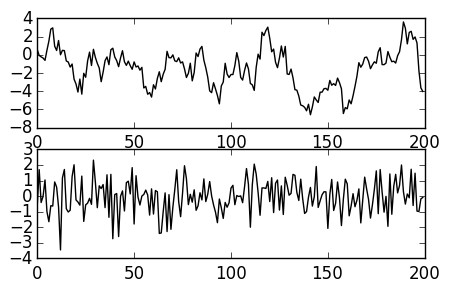

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbc79f02410>

In [35]:
figure(figsize=(5,3))
subplot(211)
plot(xs[1, :]', color="k")
subplot(212)
plot(xf[1, :]', color="k")

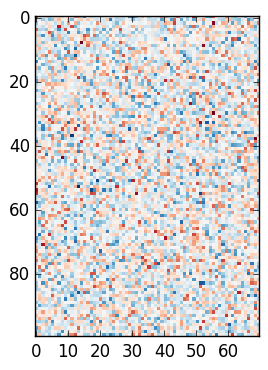

PyObject <matplotlib.image.AxesImage object at 0x7fbc790d0890>

In [57]:
figure(figsize=(4, 4))
imshow(randn(100, 70), cmap="RdBu", interpolation="nearest")

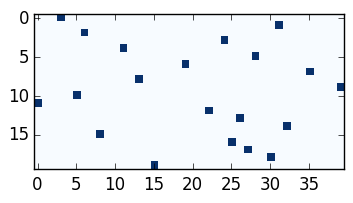

PyObject <matplotlib.image.AxesImage object at 0x7fbc793212d0>

In [53]:
figure(figsize=(4, 4))
imshow(eye(40)[1:20, randperm(40)], cmap="Blues", interpolation="nearest", )

In [83]:
m = ARMPModel(400, 200, 0.5)

z = HDStat.zFunc(m)
l = -1 / m.c * (1 + m.phi)^2 - sqrt(eps(Float64))
u = -1 / m.c * (1 - m.phi)^2 + sqrt(eps(Float64))

-0.1249999850988388

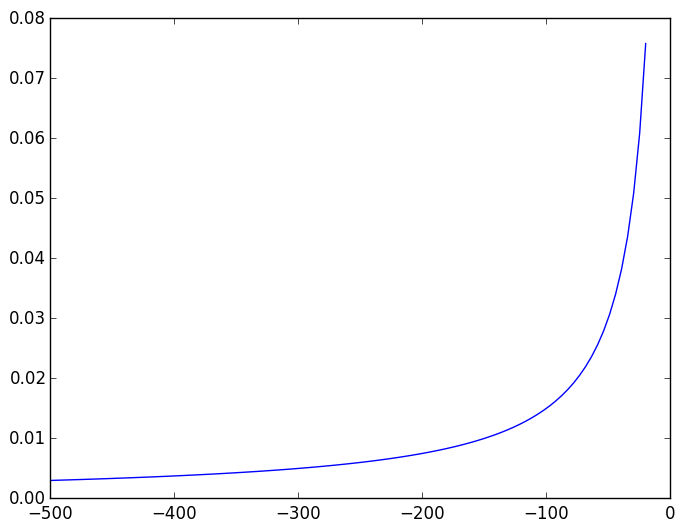

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbc77961d90>

In [95]:
x = linspace(-20, - 500, 100)
plot(x, map(z, x))

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 21 days
INFO: Loading help data...


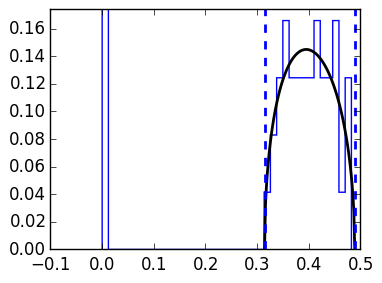

(0.0,0.17389116452466138)

In [1]:
using PyPlot

n, m, k = 5000, 2000, 40

U = qr(randn(n, k))[1]
S = eye(n)[randperm(n)[1:m], :]

A = (S * U * U' * S')
e = sort(real(eig(A)[1]))
tp, tm = (sqrt(m * k / n / n) + sqrt((1 - m / n) * (1 - k / n)))^2, (sqrt(m * k / n / n) - sqrt((1 - m / n) * (1 - k / n)))^2
mu(t) = sqrt((tp - t) * (t - tm)) / 2 / pi / m * n / t / (1 - t)
x = linspace(tm, tp, 101)
y = map(mu, x)

figure(figsize=(4, 3))
plt.hist(e, normed=true, histtype="step", bins=40)
plot(1 - x, y, linewidth=2, color="k")
axvline(1 - tp, linestyle="--", linewidth=2)
axvline(1 - tm, linestyle="--", linewidth=2)
ylim([0, maximum(y) * 1.2])

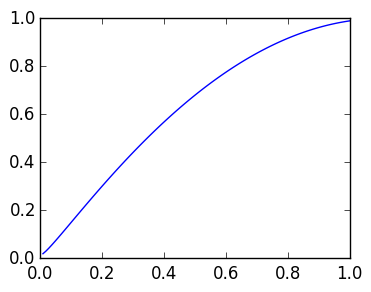

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9a027366d0>

In [2]:
figure(figsize=(4, 3))
k = 0.01
m = linspace(k, 1, 101)
plot(m, 1 - (sqrt(m * k)+ sqrt((1 - m) * (1 - k)).^2).^2)

In [55]:
(sqrt(k / n) + sqrt((n / m - 1) * (1 - k / n)))^2

4.7595917942265435

In [17]:
m, k, n = 2000, 40, 5000

function trial(a)
    A = qr(randn(n, k))[1][randperm(n)[1:m], :]
    X = A * A'
    1 - trace(A' * inv(X + 1 / a * eye(m)) * A) / k
end

x = logspace(0, 2, 100);
y = map(trial, x);

100-element Array{Float64,1}:
 0.715159 
 0.704428 
 0.695758 
 0.687621 
 0.675986 
 0.666452 
 0.654339 
 0.6457   
 0.63278  
 0.623389 
 0.611709 
 0.600041 
 0.588775 
 ⋮        
 0.040614 
 0.0383991
 0.037284 
 0.0354015
 0.0339068
 0.0322042
 0.0309805
 0.0298237
 0.028243 
 0.0269226
 0.025694 
 0.0248145

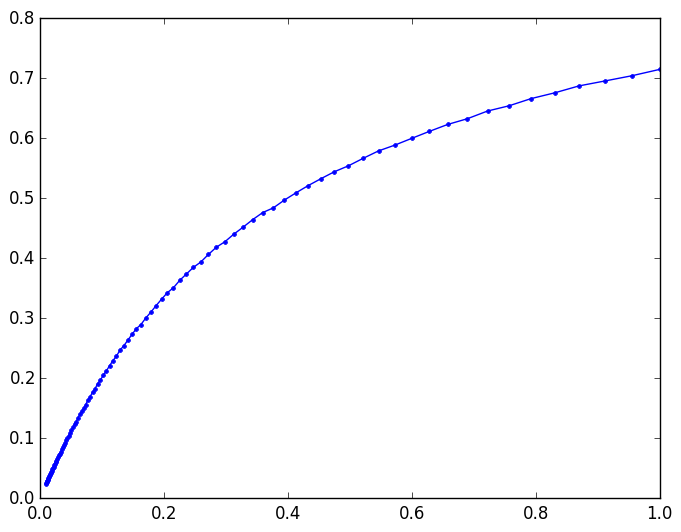

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3120840190>

In [23]:
using PyPlot

plot(1 ./ x, y, ".-")
# xscale("log")

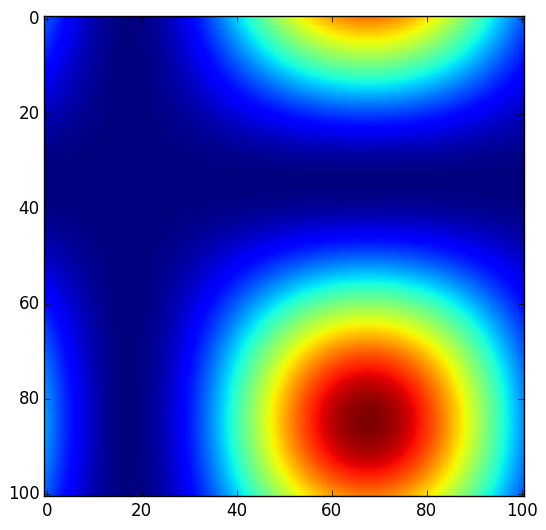

PyObject <matplotlib.image.AxesImage object at 0x7f3f7eb29b38>

In [35]:
using PyPlot

alpha = linspace(0, 6.28, 101)
beta = linspace(0, 6.28, 101)'
coef = randn(4)
coef = rand(2) * 2 * 3.1415926
f = 0
f = randn() .* (cos(alpha + coef[1]) + 1) .* (beta + coef[2])
# f = coef[1] .* cos(alpha) .* cos(beta)
# f += coef[2] .* cos(alpha) .* sin(beta)
# f += coef[3] .* sin(alpha) .* cos(beta)
# f += coef[4] .* sin(alpha) .* sin(beta)

imshow(f)

In [32]:
size(coef[1] .* cos(alpha) .* sin(beta))

(101,101)